In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# my raw data

raw_data = pd.read_csv("./data/heart-disease.csv") 

# visualizing the raw data info

print("Shape of dataset:\n", raw_data.shape)
display(raw_data.head())

raw_data.info()

raw_data.describe()

raw_data.isnull().sum()


Shape of dataset:
 (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

min and max age : 
 (np.int64(29), np.int64(77)) 



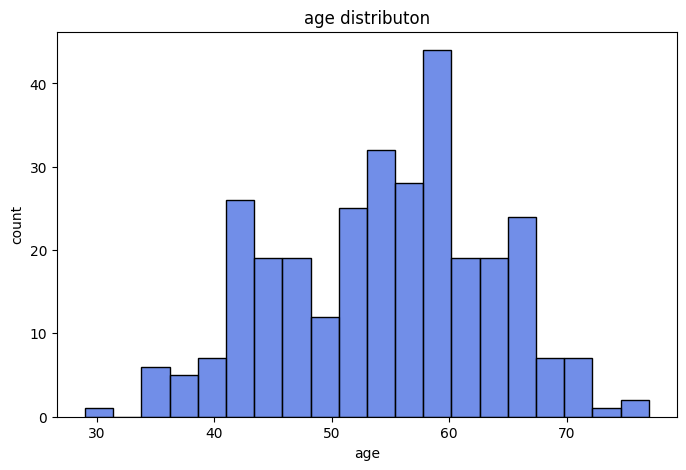

target
1    165
0    138
Name: count, dtype: int64

In [8]:
# check the age range 
print((f"min and max age : \n {raw_data['age'].min(), raw_data['age'].max()} \n"))

# visualization using histplots
plt.figure(figsize=(8,5))
sns.histplot(raw_data,x="age",bins=20,color="royalblue")
plt.title("age distributon")
plt.xlabel("age")
plt.ylabel("count")
plt.show()
# how many patients with disease
(raw_data["target"]).value_counts()


 average age of patients with disease target
0    56.601449
1    52.496970
Name: age, dtype: float64


C:\Users\dell\AppData\Local\Temp\ipykernel_5288\3094563662.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target",y="age",data=raw_data,palette="coolwarm")


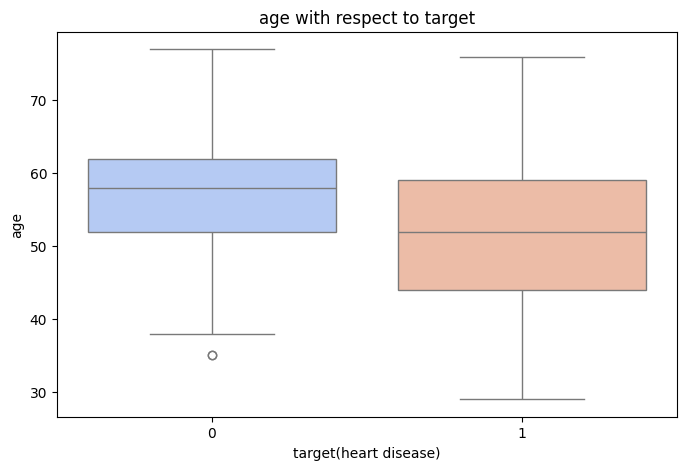

In [9]:
# average age of patients with the disease
print(f" average age of patients with disease {raw_data.groupby("target")["age"].mean()}")

#visualizing age vs heart disease

plt.figure(figsize=(8,5))
sns.boxplot(x="target",y="age",data=raw_data,palette="coolwarm")
plt.title("age with respect to target")
plt.xlabel("target(heart disease)")
plt.ylabel("age")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

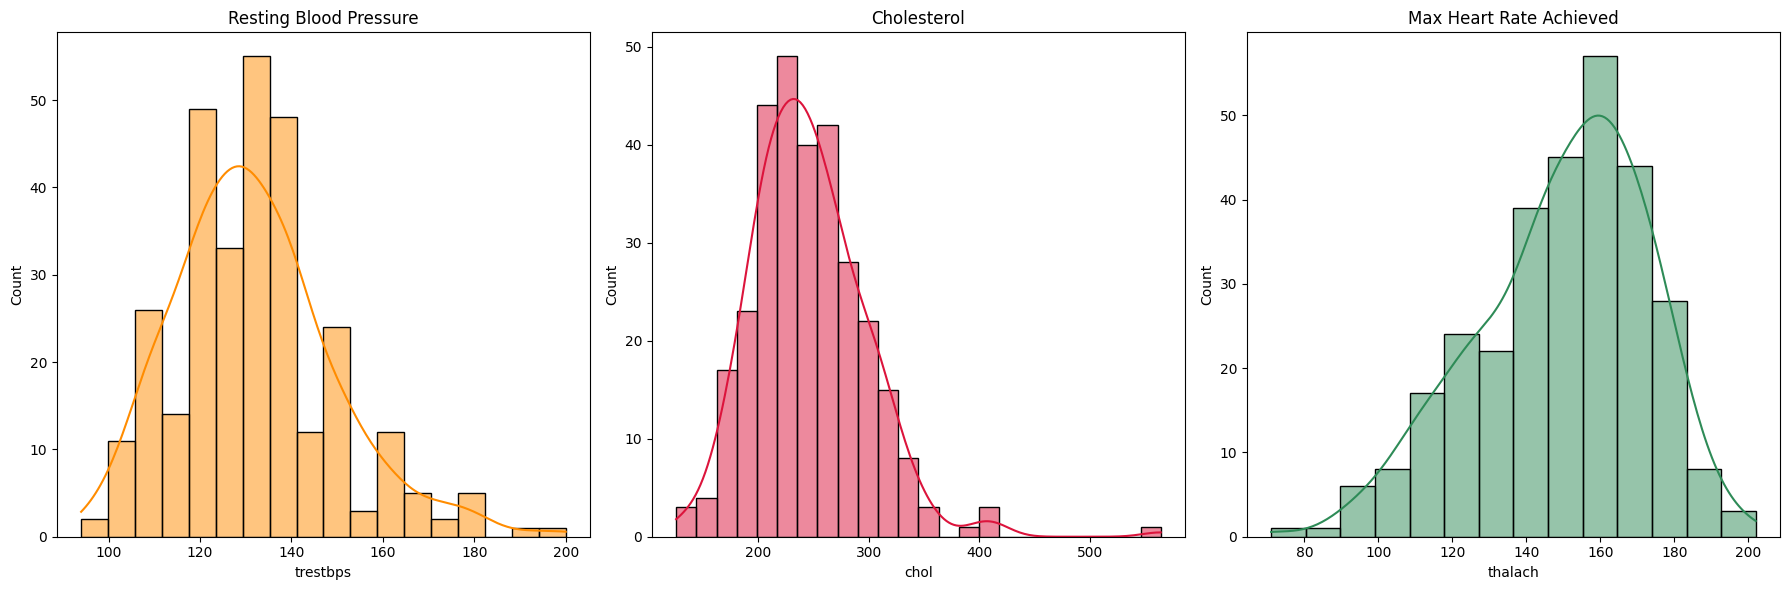

In [10]:
# checking the distribution of some features 
fig,axes=plt.subplots(1,3,figsize=(18,6))
sns.histplot(raw_data,x="trestbps",kde=True,ax=axes[0],color="darkorange")
sns.histplot(raw_data,x="chol",kde=True,ax=axes[1],color="crimson")
sns.histplot(raw_data,x="thalach",kde=True,ax=axes[2],color="seagreen")
axes[0].set_title("Resting Blood Pressure")
axes[1].set_title("Cholesterol")
axes[2].set_title("Max Heart Rate Achieved")
plt.tight_layout()
plt.show

In [12]:
# checking the relation between all features and the target,dropped the target to avoid the 1.00
corr_target=raw_data.corr()["target"].sort_values(ascending=False).drop("target")
print(f"corrolation with target :\n {corr_target}")
strong_corr_with_target=corr_target[abs(corr_target)>0.2]
print(f" \n strong corrolation with target :\n {strong_corr_with_target}")


corrolation with target :
 cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64
 
 strong corrolation with target :
 cp         0.433798
thalach    0.421741
slope      0.345877
age       -0.225439
sex       -0.280937
thal      -0.344029
ca        -0.391724
oldpeak   -0.430696
exang     -0.436757
Name: target, dtype: float64
